# Challenge

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017. The following information is available for each flight:

* Fecha-I: Scheduled date and time of the flight.
* Vlo-I : Scheduled flight number.
* Ori-I : Programmed origin city code.
* Des-I : Programmed destination city code.
* Emp-I : Scheduled flight airline code.
* Fecha-O : Date and time of flight operation.
* Vlo-O : Flight operation number of the flight.
* Ori-O : Operation origin city code
* Des-O : Operation destination city code.
* Emp-O : Airline code of the operated flight.
* DIA: Day of the month of flight operation.
* MES : Number of the month of operation of the flight.
* AÑO : Year of flight operation.
* DIANOM : Day of the week of flight operation.
* TIPOVUELO : Type of flight, I =International, N =National.
* OPERA : Name of the airline that operates.
* SIGLAORI: Name city of origin.
* SIGLADES: Destination city name.

## Question #1

How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

In [5]:
import pandas as pd
from datetime import datetime, time
from datetime import timedelta


# Load data
df = pd.read_csv('dataset_SCL.csv')
print(df.isna().sum())
# There is a NA in Vlo-O
df = df[df['Vlo-O'].notna()]

# 1. How is the data distributed?
# Show summary statistics for relevant columns
print(df[['Fecha-I', 'Fecha-O']].describe())


# Count number of unique values for categorical columns
for col in ['Ori-I', 'Des-I', 'Emp-I', 'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES']:
    print(col + ':', df[col].nunique())

# Count number of flights by month and type of flight
print(df.groupby(['MES', 'TIPOVUELO'])['Vlo-I'].count())

# General description
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

/home/almendra/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64
                    Fecha-I              Fecha-O
count                 68205                68205
unique                53252                62774
top     2017-07-28 13:30:00  2017-05-19 07:01:00
freq                      6                    5
Ori-I: 1
Des-I: 64
Emp-I: 30
Ori-O: 1
Des-O: 63
Emp-O: 32
DIANOM: 7
TIPOVUELO: 2
OPERA: 23
SIGLAORI: 1
SIGLADES: 62
MES  TIPOVUELO
1    I            2804
     N            3303
2    I            2499
     N            3062
3    I            2496
     N            2986
4    I            2354
     N            2666
5    I            2428
     N            2812
6    I            2373
     N            2608
7    I            2865
     N            3127
8    I            2

In [2]:
pd.set_option('display.max_columns', None)
df

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0      2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1      2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2      2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3      2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4      2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   
...                    ...   ...   ...   ...   ...                  ...   ...   
68201  2017-12-22 14:55:00   400  SCEL  SPJC   JAT  2017-12-22 15:41:00   400   
68202  2017-12-25 14:55:00   400  SCEL  SPJC   JAT  2017-12-25 15:11:00   400   
68203  2017-12-27 14:55:00   400  SCEL  SPJC   JAT  2017-12-27 15:35:00   400   
68204  2017-12-29 14:55:00   400  SCEL  SPJC   JAT  2017-12-29 15:08:00   400   
68205  2017-12-31 14:55:00   400  SCEL  SPJC   JAT  2017-12-31 15:04:00   400   

      Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO  \
0      SCEL  KMIA   AAL    1    1  2017    Domingo         I   
1      SCEL  KMIA   AAL    2    1  2017      Lunes         I   
2      SCEL  KMIA   AAL    3    1  2017     Martes         I   
3      SCEL  KMIA   AAL    4    1  2017  Miercoles         I   
4      SCEL  KMIA   AAL    5    1  2017     Jueves         I   
...     ...   ...   ...  ...  ...   ...        ...       ...   
68201  SCEL  SPJC   JAT   22   12  2017    Viernes         I   
68202  SCEL  SPJC   JAT   25   12  2017      Lunes         I   
68203  SCEL  SPJC   JAT   27   12  2017  Miercoles         I   
68204  SCEL  SPJC   JAT   29   12  2017    Viernes         I   
68205  SCEL  SPJC   JAT   31   12  2017    Domingo         I   

                   OPERA  SIGLAORI SIGLADES  
0      American Airlines  Santiago    Miami  
1      American Airlines  Santiago    Miami  
2      American Airlines  Santiago    Miami  
3      American Airlines  Santiago    Miami  
4      American Airlines  Santiago    Miami  
...                  ...       ...      ...  
68201       JetSmart SPA  Santiago     Lima  
68202       JetSmart SPA  Santiago     Lima  
68203       JetSmart SPA  Santiago     Lima  
68204       JetSmart SPA  Santiago     Lima  
68205       JetSmart SPA  Santiago     Lima  

[68205 rows x 18 columns]

There are 64 destinations,  2 types of flight, 23 different airlines. Almost all the data its from year 2017, with the exception of two flights. There are times when flights arrive earlier than expected, its something important to note.

## Question #2

Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:

* high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
* min_diff : difference in minutes between Date-O and Date-I .
* delay_15 : 1 if min_diff > 15, 0 if not.
* period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), basedonDate-I .

In [6]:
# 2. Generate additional columns
# Create min_diff column
def get_min_diff(row):
    fecha_i = datetime.strptime(row['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    fecha_o = datetime.strptime(row['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    if fecha_o < fecha_i:
        fecha_o += timedelta(days=1)
        diff =  fecha_i - fecha_o
        min_diff = -diff.seconds//60
    else: 
        fecha_o += timedelta(days=1)
        diff =  fecha_o - fecha_i
        min_diff = diff.seconds//60
    return min_diff

df['min_diff'] = df.apply(lambda row: get_min_diff(row), axis=1)

# Create delay_15 column
df['delay_15'] = (df['min_diff'] > 15).astype(int) 
# Convert Fecha-I and Fecha-O to datetime format
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')

# Create high_season column
df['high_season'] = ((df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 15)) | \
                    ((df['Fecha-I'].dt.month == 1) | (df['Fecha-I'].dt.month == 2) | (df['Fecha-I'].dt.month == 3)) | \
                    ((df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.day <= 31)) | \
                    ((df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) & (df['Fecha-I'].dt.day <= 30))
df['high_season'] = df['high_season'].astype(int)


# Create period_day column
morning = range(5, 12)
afternoon = range(12, 19)
night = list(range(0, 5)) + list(range(19, 24))
df['period_day'] = df['Fecha-I'].apply(lambda x: 'morning' if x.time().hour in morning else \
                                                        ('afternoon' if x.time().hour in afternoon else 'night'))

# Export to CSV
df[['high_season', 'min_diff', 'delay_15', 'period_day']].to_csv('synthetic_features.csv', index=False)


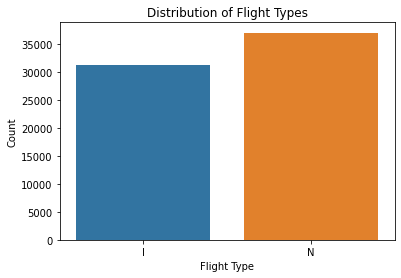

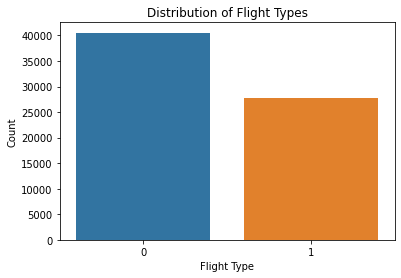

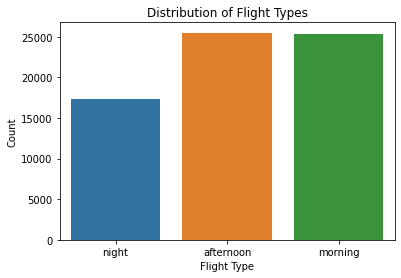

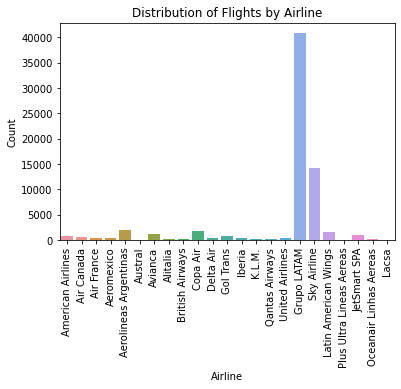

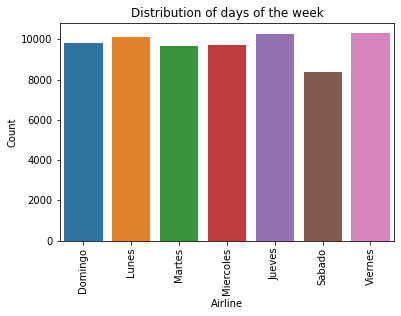

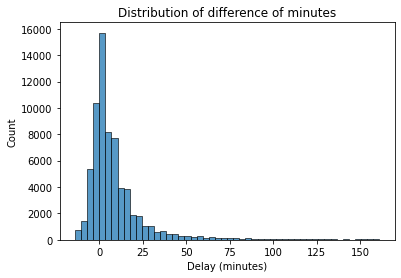

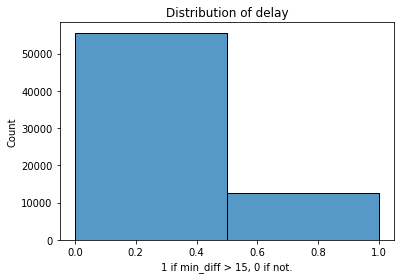

In [16]:
## Visual exploratory analysis
import seaborn as sns 
import matplotlib.pyplot as plt
    
# Plot the distribution of flight types
sns.countplot(x='TIPOVUELO', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of high season
sns.countplot(x='high_season', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of period of the day
sns.countplot(x='period_day', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of flights by airline
sns.countplot(x='OPERA', data=df)
plt.title('Distribution of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of flights by airline
sns.countplot(x='DIANOM', data=df)
plt.title('Distribution of days of the week')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of delays
sns.histplot(x='min_diff', data=df, bins=50)
plt.title('Distribution of difference of minutes')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of the target variable
sns.histplot(data=df, x='delay_15', bins=2)
plt.title('Distribution of delay')
plt.xlabel('1 if min_diff > 15, 0 if not.')
plt.ylabel('Count')
plt.show()




## Question #3

What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

In [17]:
# Destination delay
dest_delay = df.groupby('Des-I').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(dest_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Airline delay
airline_delay = df.groupby('OPERA').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(airline_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Month delay
month_delay = df.groupby('MES').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(month_delay.sort_values(['MES'], ascending=[True]))

# Day of the week delay
dayofweek = df.groupby('DIANOM').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(dayofweek.sort_values([('delay_15', 'count')], ascending=[False]))

# Season Delay
season_delay = df.groupby('high_season').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(season_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Type of flight delay
flighttype_delay = df.groupby('TIPOVUELO').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
print(flighttype_delay.sort_values([('delay_15', 'count')], ascending=[False]))

       delay_15          min_diff
           mean count        mean
Des-I                            
SCFA   0.146363  5787    7.023155
SPJC   0.230404  5269   11.737901
SCCF   0.122255  5145    5.970262
SCTE   0.168465  4357    8.868028
SCIE   0.156446  3995    8.392240
...         ...   ...         ...
SARI   0.000000     1   -2.000000
SBFI   0.000000     1    5.000000
SLCB   1.000000     1  113.000000
SEQM   1.000000     1   24.000000
SEQU   1.000000     1   80.000000

[64 rows x 3 columns]
                          delay_15          min_diff
                              mean  count       mean
OPERA                                               
Grupo LATAM               0.178666  40892   9.470630
Sky Airline               0.177647  14298   8.117149
Aerolineas Argentinas     0.240123   1949  10.004618
Copa Air                  0.062703   1850   0.214054
Latin American Wings      0.407053   1673  24.579199
Avianca                   0.265625   1152  11.131944
JetSmart SPA            

In [18]:
# without min_diff and count
# Destination delay
dest_delay = df.groupby('Des-I').agg({'delay_15': 'mean'})

# Airline delay
airline_delay = df.groupby('OPERA').agg({'delay_15': 'mean'})

# Month delay
month_delay = df.groupby('MES').agg({'delay_15': 'mean'})

# Day of the week delay
dayofweek = df.groupby('DIANOM').agg({'delay_15': 'mean'})

# Season Delay
season_delay = df.groupby('high_season').agg({'delay_15': 'mean'})

# Type of flight delay
flighttype_delay = df.groupby('TIPOVUELO').agg({'delay_15': 'mean'})


<bound method Axes.set_title of <AxesSubplot:xlabel='TIPOVUELO'>>

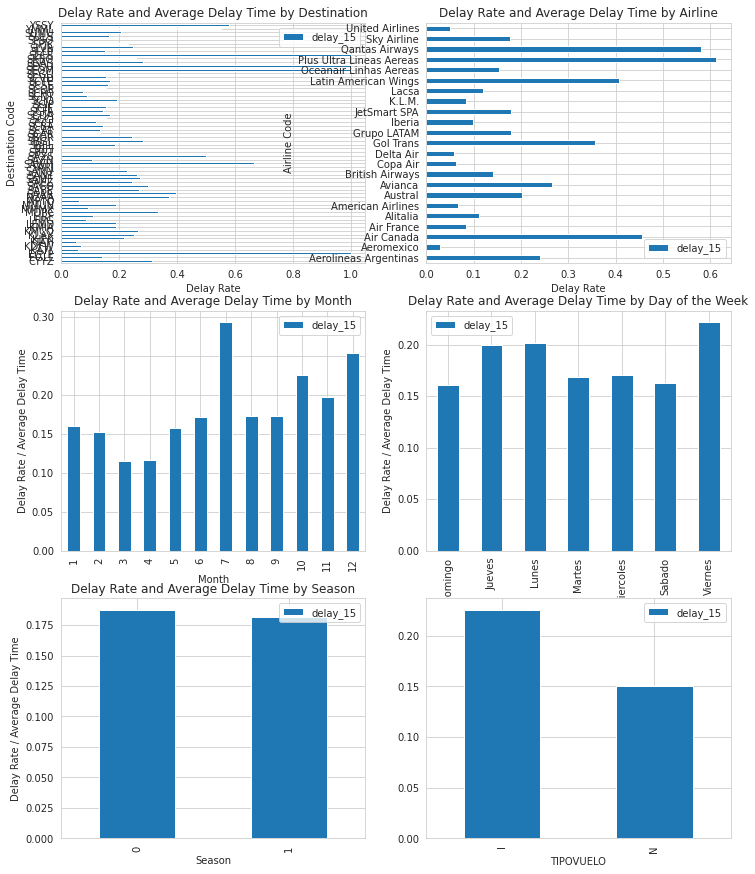

In [19]:
# Plot the delay rate and average delay time by destination, airline, month, day of the week, season, and type of flight
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

dest_delay.plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_title('Delay Rate and Average Delay Time by Destination')
axes[0, 0].set_xlabel('Delay Rate')
axes[0, 0].set_ylabel('Destination Code')

airline_delay.plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_title('Delay Rate and Average Delay Time by Airline')
axes[0, 1].set_xlabel('Delay Rate')
axes[0, 1].set_ylabel('Airline Code')

month_delay.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Delay Rate and Average Delay Time by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Delay Rate / Average Delay Time')

dayofweek.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Delay Rate and Average Delay Time by Day of the Week')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Delay Rate / Average Delay Time')

season_delay.plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Delay Rate and Average Delay Time by Season')
axes[2, 0].set_xlabel('Season')
axes[2, 0].set_ylabel('Delay Rate / Average Delay Time')

flighttype_delay.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title

Based on the exploratory analysis, we can observe the following behavior of delay rate across different variables:

* Destination: Flights departing to some specific destinations have a higher likelihood of getting delayed. 

* Airline: Different airlines have different delay rates. For example, Latin American Wings has a relatively higher delay rate as compared to other airlines.

* Month of the year: The delay rate is relatively higher in some specific months such as July, October and December.

* Day of the week: The delay rate is relatively higher on some specific days such as Fridays.

* Season: The delay rate is almost the same on both cases.

* Type of flight: International flights have a relatively higher delay rate as compared to national flights.

In [11]:
d

NameError: name 'dest_delay' is not defined

## Question #4

Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables.

In [7]:
# Import libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# New variables
# ....

# Define features and target variable
df = df.drop(['Fecha-I', 'Fecha-O', 'Vlo-I', 'Vlo-O', 'DIA', 'Ori-I', 'Ori-O', 'SIGLAORI', 'SIGLADES', 'Des-I', 'Emp-O', 'AÑO'], axis=1)
df['MES'] = df['MES'].astype(str)
string_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=string_columns)

# Split the dataset into X (features) and y (target variable)
X = df.drop(['delay_15', 'min_diff'], axis=1)
y = df['delay_15']
df = df.loc[:,~df.columns.duplicated()].copy()

# Balance the target variable using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.values, y.ravel())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate model performance
lr_acc = accuracy_score(y_test, lr_preds)
lr_prec = precision_score(y_test, lr_preds)
lr_rec = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)

rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

print("Logistic Regression Model:")
print(f"Accuracy: {lr_acc}")
print(f"Precision: {lr_prec}")
print(f"Recall: {lr_rec}")
print(f"F1-score: {lr_f1}")

print("\nRandom Forest Model:")
print(f"Accuracy: {rf_acc}")
print(f"Precision: {rf_prec}")
print(f"Recall: {rf_rec}")
print(f"F1-score: {rf_f1}")


/home/almendra/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Model:
Accuracy: 0.7878310923236048
Precision: 0.875968992248062
Recall: 0.6663340288487708
F1-score: 0.7569043693322343

Random Forest Model:
Accuracy: 0.8245716598462023
Precision: 0.8180032148597964
Recall: 0.8309897487072485
F1-score: 0.8244453444939472


Nos interesa minimizar la cantidad de falsos positivos, debido a que el costo de adaptar la operación debido a un falso retraso es alto, ya que podría tener implcancias como re agendar vuelos, problemas logistísticos con los aeropuertos, etc...

Dado lo anterior, se debería utilizar la métrica de precision para realizar la optimización de hiperparámetros, ya que al maximizar esta métrica, reducimos al mínimo la cantidad de falsos positivos, logrando ahorros en costos operacionales.

*inserte foto/formula de la definicion de precision*

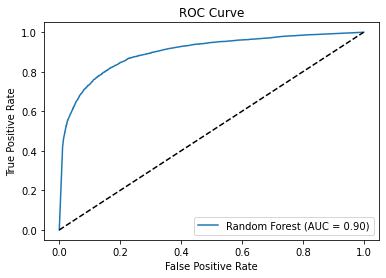

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

y_pred_proba = rf_model.predict_proba(X_test)[:,1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
pd.set_option('max_row', None)
pd.DataFrame([X.columns,rf_model.feature_importances_]).T.sort_values(by=1, ascending=False)

0            1
112                  DIANOM_Viernes    0.0369716
107                   DIANOM_Jueves    0.0368611
108                    DIANOM_Lunes    0.0353915
0                       high_season    0.0336341
106                  DIANOM_Domingo    0.0319669
110                DIANOM_Miercoles    0.0317792
109                   DIANOM_Martes    0.0300033
111                   DIANOM_Sabado    0.0287617
97                           MES_12    0.0282922
139              period_day_morning    0.0279346
138            period_day_afternoon    0.0277328
140                period_day_night    0.0243198
95                           MES_10    0.0231872
96                           MES_11    0.0230707
104                           MES_8    0.0227769
105                           MES_9    0.0224076
102                           MES_6    0.0222637
100                           MES_4    0.0217325
103                           MES_7    0.0216022
101                           MES_5    0.0212419
94                            MES_1    0.0190971
71                       Des-O_SCFA    0.0183236
98                            MES_2    0.0179689
99                            MES_3    0.0179059
79                       Des-O_SCTE    0.0169845
70                       Des-O_SCDA     0.015412
68                       Des-O_SCCF    0.0151122
88                       Des-O_SPJC    0.0149789
72                       Des-O_SCIE    0.0149689
78                       Des-O_SCSE    0.0127455
53                       Des-O_SAEZ    0.0123746
77                       Des-O_SCQP    0.0120302
65                       Des-O_SCAR    0.0118199
69                       Des-O_SCCI    0.0109664
113                     TIPOVUELO_I    0.0100019
64                       Des-O_SBGR   0.00991564
66                       Des-O_SCAT   0.00982311
18                        Emp-I_LAN   0.00946982
114                     TIPOVUELO_N   0.00928529
51                       Des-O_SABE   0.00894503
54                       Des-O_SAME   0.00843068
127               OPERA_Grupo LATAM   0.00808301
84                       Des-O_SKBO   0.00716136
91                       Des-O_SUMU   0.00690364
132      OPERA_Latin American Wings   0.00640261
52                       Des-O_SACO    0.0061686
67                       Des-O_SCBA   0.00593365
20                        Emp-I_LAW   0.00588437
80                       Des-O_SCVD   0.00575718
28                        Emp-I_SKU   0.00570506
136               OPERA_Sky Airline   0.00559419
42                       Des-O_LEMD   0.00422539
41                       Des-O_KMIA   0.00404188
29                        Emp-I_TAM    0.0038277
63                       Des-O_SBGL   0.00366818
46                       Des-O_MMMX   0.00363064
81                       Des-O_SEGU   0.00358375
48                       Des-O_MPTO   0.00348025
10                        Emp-I_CMP   0.00333015
124                  OPERA_Copa Air   0.00322876
73                       Des-O_SCIP   0.00307172
38                       Des-O_KJFK   0.00301255
13                        Emp-I_GLO   0.00277072
49                       Des-O_NZAA   0.00267746
2                         Emp-I_ACA   0.00243508
86                       Des-O_SLLP   0.00241394
117                OPERA_Air Canada   0.00241285
126                 OPERA_Gol Trans   0.00238073
74                       Des-O_SCJO   0.00219452
1                         Emp-I_AAL   0.00209612
76                       Des-O_SCPQ   0.00208453
5                         Emp-I_ARG    0.0019632
62                       Des-O_SBFL   0.00192654
39                       Des-O_KLAX   0.00192563
115     OPERA_Aerolineas Argentinas   0.00185654
7                         Emp-I_AVA   0.00178158
120         OPERA_American Airlines    0.0016144
122                   OPERA_Avianca   0.00158958
4                         Emp-I_AMX   0.00150191
87                       Des-O_SLVR   0.00139964
50                       Des-O_SAAR   0.00113653
129             

In [28]:
X

DIA  MES   AÑO  high_season  Vlo-I_4  Vlo-I_6  Vlo-I_8  Vlo-I_10  \
0        1    1  2017            1        0        0        0         0   
1        2    1  2017            1        0        0        0         0   
2        3    1  2017            1        0        0        0         0   
3        4    1  2017            1        0        0        0         0   
4        5    1  2017            1        0        0        0         0   
...    ...  ...   ...          ...      ...      ...      ...       ...   
68201   22   12  2017            1        0        0        0         0   
68202   25   12  2017            1        0        0        0         0   
68203   27   12  2017            1        0        0        0         0   
68204   29   12  2017            1        0        0        0         0   
68205   31   12  2017            1        0        0        0         0   

       Vlo-I_26  Vlo-I_32  Vlo-I_33  Vlo-I_43  Vlo-I_50  Vlo-I_52  Vlo-I_54  \
0             0         0         0         0         0         0         0   
1             0         0         0         0         0         0         0   
2             0         0         0         0         0         0         0   
3             0         0         0         0         0         0         0   
4             0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
68201         0         0         0         0         0         0         0   
68202         0         0         0         0         0         0         0   
68203         0         0         0         0         0         0         0   
68204         0         0         0         0         0         0         0   
68205         0         0         0         0         0         0         0   

       Vlo-I_86  Vlo-I_88  Vlo-I_110  Vlo-I_112  Vlo-I_200  Vlo-I_201  \
0             0         0          0          0          0          0   
1             0         0          0          0          0          0   
2             0         0          0          0          0          0   
3             0         0          0          0          0          0   
4             0         0          0          0          0          0   
...         ...       ...        ...        ...        ...        ...   
68201         0         0          0          0          0          0   
68202         0         0          0          0          0          0   
68203         0         0          0          0          0          0   
68204         0         0          0          0          0          0   
68205         0         0          0          0          0          0   

       Vlo-I_202  Vlo-I_203  Vlo-I_207  Vlo-I_251  Vlo-I_253  Vlo-I_255  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
68201          0          0          0          0          0          0   
68202          0          0          0          0          0          0   
68203          0          0          0          0          0          0   
68204          0          0          0          0          0          0   
68205          0          0          0          0          0          0   

       Vlo-I_265  Vlo-I_267  Vlo-I_269  Vlo-I_271  Vlo-I_273  Vlo-I_275  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4   